In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler 
import seaborn as sns
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [2]:
df = pd.read_csv("housingg.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [3]:
df.Address.value_counts()

208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101             1
314 Christopher Square Apt. 404\nLake Ronaldville, SD 42025      1
21042 Wilson Islands Suite 238\nFischerchester, MP 42425-4129    1
Unit 8831 Box 5748\nDPO AE 73012-7314                            1
481 Kaitlin Mission Apt. 309\nJodystad, IA 16947                 1
                                                                ..
054 Carter Crescent Suite 674\nGlennport, WA 11140               1
8460 Kathleen Mission Apt. 482\nPort Amytown, KY 72016           1
3737 Hartman Rue\nReneestad, ID 69250-7718                       1
3465 Latoya Well\nNelsonmouth, MI 55741-4287                     1
37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595          1
Name: Address, Length: 5000, dtype: int64

### address is unique 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### there is no outliers 

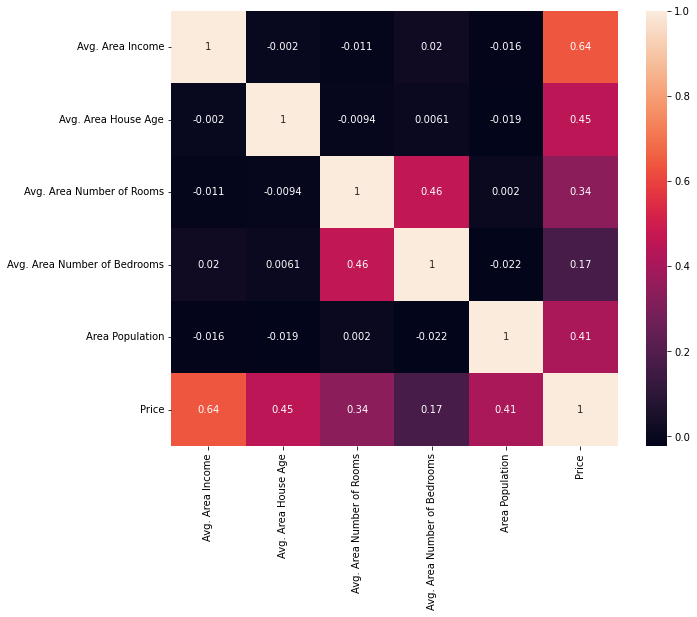

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr() , annot=True)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Price','Address'] ,axis = 1) ,df['Price'], test_size = 0.15 , random_state = 42)

In [8]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2347,51168.428595,7.511730,7.083326,3.10,30369.193120
3439,83648.232739,8.243927,6.751507,3.32,21137.028874
4998,68001.331235,5.534388,7.130144,5.44,42625.620156
4826,79874.739355,4.936371,7.146377,4.14,30410.232961
3922,53562.403541,6.323328,4.027931,3.13,17964.469901


In [9]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [10]:
std_scl = StandardScaler()
X_train_scaled=std_scl.fit_transform(X_train)
X_test_scaled = std_scl.transform(X_test)

In [11]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled,y_train)

Lasso()

In [12]:
y_pred = lasso_model.predict(X_train_scaled)
y_pred

array([1027559.21318371, 1673936.53717767, 1265112.40631341, ...,
       1237865.8174758 , 1733840.07840599, 1166667.12405199])

In [13]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_pred))
rmse_train

100905.16552769333

In [14]:
rmse = np.sqrt(mean_squared_error(y_test,lasso_model.predict(X_test_scaled)))
rmse

102304.78588969335

In [15]:
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)

ElasticNet()

In [16]:
rmse = np.sqrt(mean_squared_error(y_test,elastic.predict(X_test_scaled)))
rmse

152048.8208110695

## this model is to bad

In [17]:
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)

Ridge()

In [18]:
rmse = np.sqrt(mean_squared_error(y_test,ridge.predict(X_test_scaled)))
rmse

102303.48520992554

## this almost like lasso 